In [1]:
import os
import cv2
import shutil
import tempfile
import tensorflow as tf
import subprocess

In [2]:
# get unichar and map accordingly
def getAlphabet(unichar_dir):
    num_cat = 2 + ord(u'\u007f')+1-ord(u'\u0021') + ord(u'\u0e7f')+1-ord(u'\u0e00')
    unichar_path = unichar_dir+'charset_size={}.txt'.format(num_cat)
    alphabet = u''
    with open(unichar_path, 'r', encoding = 'utf-8') as f:
        lines = f.readlines()
        for line in lines[:len(lines)-1]:
            alphabet += line.strip('\n').split('\t')[1]
    return alphabet, unichar_path

def cleanup(temp_dir):
    ''' Tries to remove the whole temp_dir '''
    try:
        shutil.rmtree(temp_dir)
    except OSError:
        pass

In [3]:
def inference(data_path, decoder_path, python_dir, train_dir, encoding='UTF-8', cuda_device=""):
    os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
    os.environ["CUDA_VISIBLE_DEVICES"] = cuda_device
    os.environ["PYTHONIOENCODING"] = encoding
    
    os.chdir(python_dir)
    command = []
    command += ('python3', 'inference.py',
                '--image', data_path,
                '--decoder', decoder_path,
                '--train_dir', train_dir)
    result = subprocess.check_output(command)
    return result.decode('utf-8')

def my_predict(folder_dir, decoder_path):
    tempdir = tempfile.mkdtemp()
    # run inference
    result = inference(image_path, decoder_path, folder_dir+'python', folder_dir+'model')
    cleanup(tempdir)
    return result

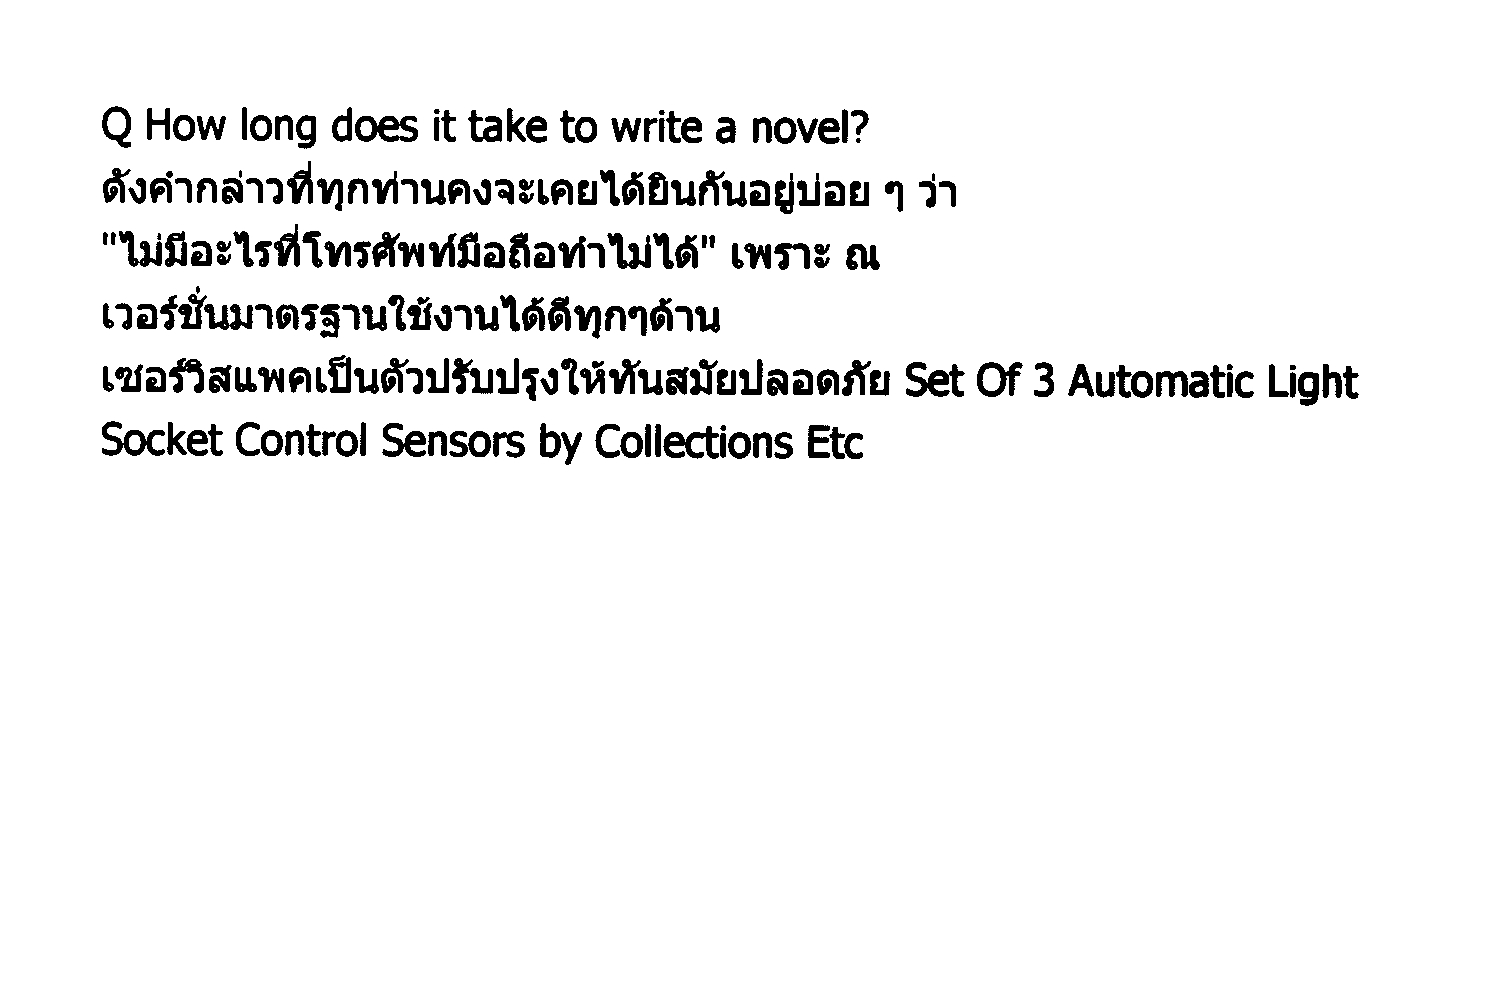

In [4]:
# choose the image for inference
image_path = '/data/test_image/0-Tahoma.tif'
lang_choice='tha+eng'
# image_path = '/data/test_image/tha+eng3.png'
# image_path = '/data/test_image/tha+eng2.jpg'
# display image
from PIL import Image
display(Image.open(image_path))

Box[0]


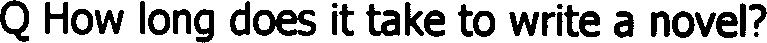

Box[1]


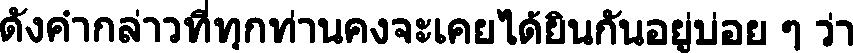

Box[2]


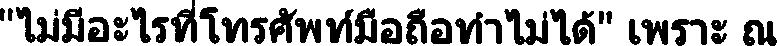

Box[3]


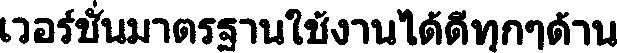

Box[4]


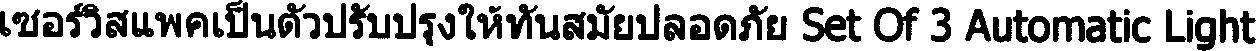

Box[5]


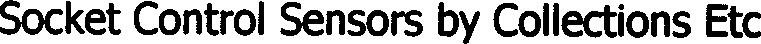

Box[0]: x=102, y=106, w=767, h=43
Box[1]: x=103, y=161, w=853, h=53
Box[2]: x=103, y=224, w=777, h=46
Box[3]: x=103, y=286, w=617, h=53
Box[4]: x=103, y=355, w=1256, h=51
Box[5]: x=102, y=421, w=761, h=44


In [5]:
### Preprocessing

from tesserocr import PyTessBaseAPI, RIL

with PyTessBaseAPI(lang = 'tha+eng') as api:
    image = Image.open(image_path)
    api.SetImage(image)
    boxes = api.GetComponentImages(RIL.TEXTLINE, True)
    #print(boxes)
    #print('Found {} box image components.'.format(len(boxes)))
    for i in range(len(boxes)):
        print('Box[{}]'.format(i))
        display(boxes[i][0])

    for i, (im, box, _, _) in enumerate(boxes):
        # im is a PIL image object
        # box is a dict with x, y, w and h keys
        api.SetRectangle(box['x'], box['y'], box['w'], box['h'])
        ocrResult = api.GetUTF8Text()
        conf = api.MeanTextConf()
#         print(u"Box[{0}]: x={x}, y={y}, w={w}, h={h}, "
#                "confidence: {1}, text: {2}".format(i, conf, ocrResult, **box))
        print(u"Box[{0}]: x={x}, y={y}, w={w}, h={h}".format(i, **box))

In [6]:
# customized params
folder_dir = '/data/orig-sequence-model/'
output_dir = '/data/'
unichar_dir = output_dir+'sequence-model/dataset/tha+eng/'
alphabet, decoder_path = getAlphabet(unichar_dir)
# my model
import time
start = time.time()
my_pred = my_predict(folder_dir, decoder_path)
print(my_pred)
#print('spent: {:.2f}s'.format(time.time()-start))

Found 6 box image components.
Q How long does it take to write a novel?
ดังคำกล่าวที่ทุกท่านคงจะเคยได้ยินกันอยู่บอย ๆ ว่า
"ไม่มีอะไรที่โทรศัพท์มือถือทำไม่ได้" เพราะ ณ
เวอร์ชั่นมาตรฐานใช้งานได้ดีทุกๆด้าน
เซอร์วิสแพคเป็นตัวปรับปรุงให้ทันสมัยปลอตภัย Set Of 3 Automatic Light
Socket Control Sensors by Collections Etc
spent: 2.17s



In [7]:
# tesseract output
import pytesseract
tessdata_prefix = "/data/tesseract-ralated/tesseract-ocr/tessdata"
os.environ["TESSDATA_PREFIX"] = tessdata_prefix
start = time.time()
print(pytesseract.image_to_string(cv2.imread(image_path), lang=lang_choice))
print('spent: {:.2f}s'.format(time.time()-start))

Q How long does it take to write a novel?

ด ั ง ค ํ า ก ล ่ า ว ท ี ่ ท ุ ก ท ่ า น ค ง จ ะ เค ย ได ้ ย ิ น ก ั น อ ย ู ่ บ ่ อ ย ๆ ว ่ า

"ไม ่ ม ี อ ะ ไร ท ี ่ โท ร ศั พ ท ์ ม ื อ ถื อ ท ํ า ไม ่ ได ้ " เพ ร า ะ ณ

เว อ ร ์ ชั ่ น ม า ต ร ฐา น ใช ้ ง า น ได ้ ด ี ท ุ ก ๆ ด ้ า น

เซ อ ร ์ ว ิ ส แพ ค เป ็ น ต ั ว ป ร ั บ ป ร ุ ง ให ้ ท ั น ส ม ั ย ป ล อ ด ภั ย 5 ๕ ! 07 3 ภิ น 10 ก า ล บ ์ ๐ ม ด ห น
Socket Control Sensors by Collections Etc
spent: 2.53s
